# CIFAR-10 Classification using AlexNet Architecture — *End to End*

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

### Load and preprocess CIFAR-10 dataset


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Exploring some data (Images) from CIFAR-10 dataset

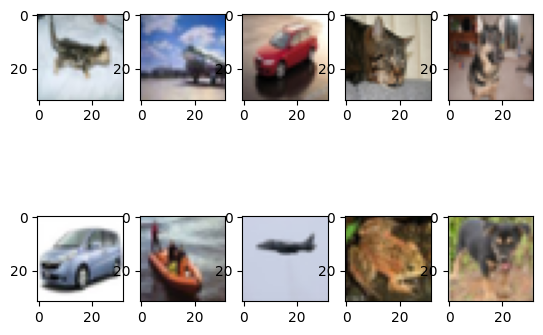

In [ ]:
# Showing 10 images randomly froom dataset
import matplotlib.pyplot as plt
import random
for i in range(10):
  random_index = random.randint(0, len(x_train))
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[random_index])
plt.show()

In [ ]:
# Showing Y label Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


 **why using astype('float32')/255.0  ???**


*   By default in MNIST, CIFAR-10, the pixel values are stored as integeres(uint8)-meaning values range from 0 to 255
*   Neural networks work better with floating-point numbers-because they require smooth, continuous gradients for learning
* So we will convert all pixel values from integers(0-255) to floats(0.0 - 1.0)



In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

**One-hot encoding**
* y_train[0] = [1,0,0,0,0,0,0,0,0,0]   # if label = 0
* y_train[1] = [0,1,0,0,0,0,0,0,0,0]   # if label = 1


In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Building AlexNet Architecture

In [ ]:
model = models.Sequential([
    # 1st Convolutional Layer
    layers.Conv2D(96, (3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    # first MaxPooling Layer
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # 2nd Convolutional Layer
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    # Second MaxPooling Layer
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # 3rd Convolutional Layer
    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    # 4th Convolutional Layer
    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    # 5th Convolutional Layer
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    # Third MaxPooling Layer
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model2 = model


### Compile Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,590,794 (112.88 MB)

 Trainable params: 29,588,042 (112.87 MB)

 Non-trainable params: 2,752 (10.75 KB)

### Train Model without data-augmentation


In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.3590 - loss: 2.9900 - val_accuracy: 0.1657 - val_loss: 3.4776
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6283 - loss: 1.0529 - val_accuracy: 0.4846 - val_loss: 1.5503
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7321 - loss: 0.7669 - val_accuracy: 0.5981 - val_loss: 1.1557
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7886 - loss: 0.6099 - val_accuracy: 0.7033 - val_loss: 0.8599
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8332 - loss: 0.4813 - val_accuracy: 0.7035 - val_loss: 0.8914
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8661 - loss: 0.3886 - val_accuracy: 0.6588 - val_loss: 1.2589
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8977 - loss: 0.2953 - val_accuracy: 0.7027 - val_loss: 1.1099
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9169 - loss: 0.2474 - 

### Evaluate the Model befor data augmentation


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 - 2s - 5ms/step - accuracy: 0.8132 - loss: 0.9699
Test accuracy: 81.32%


### Plot training history before data augmentation

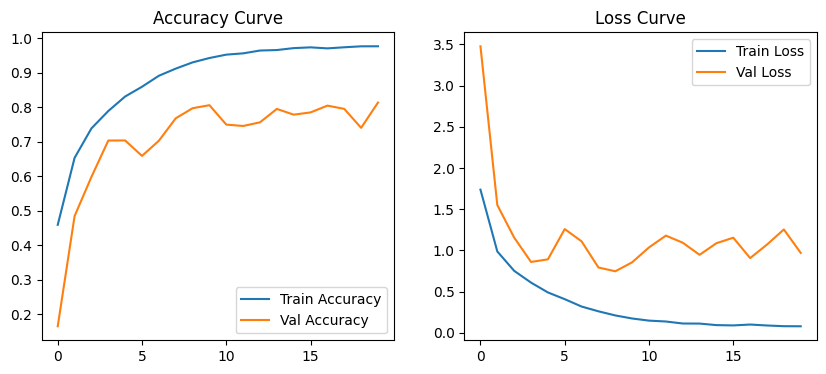

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()

plt.show()

# Improving model using data agumentation to get more good result

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 30, 30, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,590,794 (112.88 MB)

 Trainable params: 29,588,042 (112.87 MB)

 Non-trainable params: 2,752 (10.75 KB)

### Train Model using data-augmentation


In [ ]:
history2 = model2.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=20, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.3286 - loss: 2.6848 - val_accuracy: 0.2211 - val_loss: 2.8763
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.5652 - loss: 1.2191 - val_accuracy: 0.5905 - val_loss: 1.2997
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.6501 - loss: 1.0003 - val_accuracy: 0.6944 - val_loss: 0.8917
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7059 - loss: 0.8559 - val_accuracy: 0.6387 - val_loss: 1.1294
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.7415 - loss: 0.7467 - val_accuracy: 0.7052 - val_loss: 0.8556
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.7743 - loss: 0.6753 - val_accuracy: 0.6315 - val_loss: 1.2157
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.7888 - loss: 0.6296 - val_accuracy: 0.7825 - val_loss: 0.6906
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.8052 - loss: 0.5785 - val_accurac

### Evaluate the Model after data augmentation

In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7929 - loss: 0.7477
Test accuracy: 79.49%


### Plot graph after data augmentation

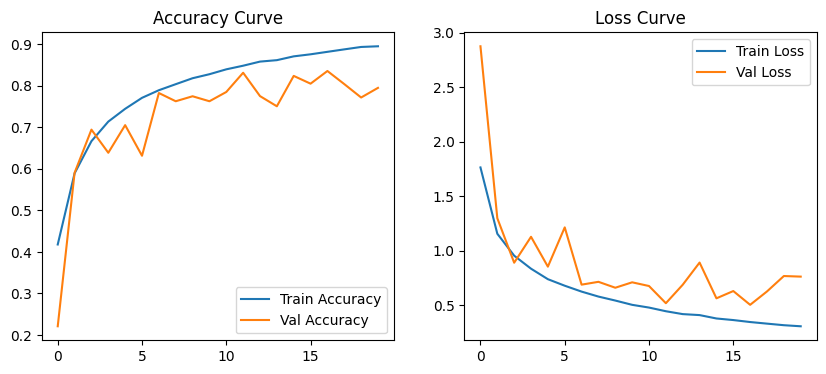

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()

plt.show()